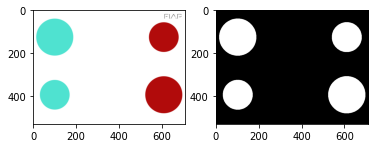

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('ckpImg.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o vermelho tem h=0 mais ou menos ou 0 para a OpenCV
image_lower_hsv1 = np.array([0, 50, 100])  
image_upper_hsv1 = np.array([10, 255, 255])


mask_hsv1 = cv2.inRange(img_hsv, image_lower_hsv1, image_upper_hsv1)

# Definição dos valores minimo e max da mascara
# o ciano tem h=180 mais ou menos ou 90 para a OpenCV
image_lower_hsv2 = np.array([85, 50, 100])  
image_upper_hsv2 = np.array([100, 255, 255])


mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

imgSeg = cv2.bitwise_or(mask_hsv1, mask_hsv2)


plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(imgSeg, cmap="Greys_r", vmin=0, vmax=255)
#plt.imshow(mask_hsv1, cmap="Greys_r", vmin=0, vmax=255)
#plt.imshow(mask_hsv2, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

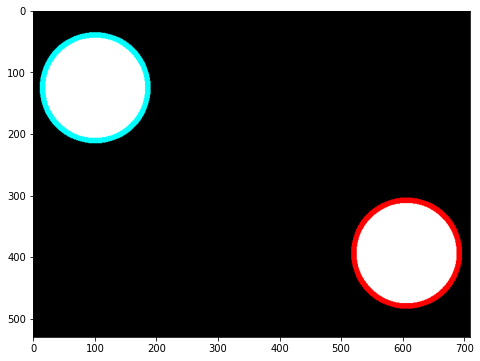

In [2]:
contornos, _ = cv2.findContours(imgSeg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
imgSeg_rgb = cv2.cvtColor(imgSeg, cv2.COLOR_GRAY2RGB) 
contornos_img = imgSeg_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

def area(item):
  return cv2.contourArea(item)
contornosOrdMaior = sorted(contornos, key=area, reverse=True)
for i in range(len(contornosOrdMaior)):
    if(i < 2):
        if(i == 0):
            cv2.drawContours(contornos_img, contornosOrdMaior, i, [255, 0, 0], 7);
        else:
            cv2.drawContours(contornos_img, contornosOrdMaior, i, [0,255,255], 7);
    else:
        cv2.drawContours(contornos_img, contornosOrdMaior, i, [0, 0, 0], -1);
        
plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

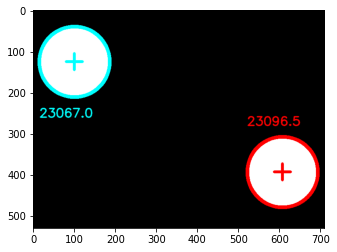

In [3]:
# usando o exemplo da documentação https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html
# notamos que a função devolve um dicionario. 

cntRed = contornos[1]
cntCyan = contornos[3]

areaRed = cv2.contourArea(cntRed)
areaCyan = cv2.contourArea(cntCyan)

MRed = cv2.moments(cntRed)
MCyan = cv2.moments(cntCyan)

# Calculo das coordenadas do centro de massa
cxRed = int(MRed['m10']/MRed['m00'])
cyRed = int(MRed['m01']/MRed['m00'])

cxCyan = int(MCyan['m10']/MCyan['m00'])
cyCyan = int(MCyan['m01']/MCyan['m00'])

# para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
colorRed = (255,0,0)
colorCyan = (0, 255, 255)

# Desenhado a cruz no circulo vermelho
cv2.line(contornos_img,(cxRed - size,cyRed),(cxRed + size,cyRed),colorRed,5)
cv2.line(contornos_img,(cxRed,cyRed - size),(cxRed, cyRed + size),colorRed,5)

# Desenhado a cruz no circulo ciano
cv2.line(contornos_img,(cxCyan - size,cyCyan),(cxCyan + size,cyCyan),colorCyan,5)
cv2.line(contornos_img,(cxCyan,cyCyan - size),(cxCyan, cyCyan + size),colorCyan,5)

# Copiando a imagem deste ponto para outra variavel (será usada nas outras rubricas)
img_crosshair = contornos_img.copy()

# Para escrever vamos definir uma fonte 
font = cv2.FONT_HERSHEY_SIMPLEX
textRed = areaRed
textCyan = areaCyan

origemRed = (520,280)
origemCyan = (15,260)

cv2.putText(contornos_img, str(textRed), origemRed, font,1,(255,0,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(textCyan), origemCyan, font,1,(0,255,255),2,cv2.LINE_AA)


plt.imshow(contornos_img);


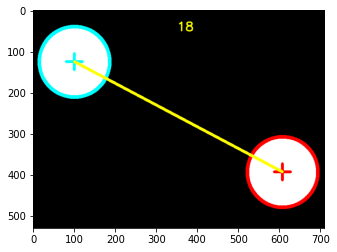

In [4]:
cv2.line(img_crosshair,(cxCyan, cyCyan),(cxRed, cyRed), (255,255,0), 5)

pont1 = (cxCyan,cyCyan)
pont2 = (cxRed,cyRed)
angulo1 = np.arctan2(*pont1[::-1])
angulo2 = np.arctan2(*pont2[::-1])

angulos = np.rad2deg((angulo1 - angulo2) % (2 * np.pi))

origem= (350, 50)
cv2.putText(img_crosshair, str(int(angulos)), origem, font,1,(255,255,0),2,cv2.LINE_AA)

plt.imshow(img_crosshair);

In [ ]:
# Thanks You !!